In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\Placement_Data_Full_Class.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df=df.drop('sl_no',axis=1)

In [5]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
df['salary']=df['salary'].fillna(df['salary'].mean())

In [9]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [10]:
# now all cleaning part is done...now we going for the eda part

In [14]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [20]:
# whether the gender is affecting the placement
df.groupby(['gender'],as_index=False)['status'].value_counts(normalize=True).sort_values(by='proportion',ascending=False)

,gender,status,proportion
2,M,Placed,0.719424
0,F,Placed,0.631579
1,F,Not Placed,0.368421
3,M,Not Placed,0.280576


In [21]:
# As we say the gender is not affecting the placement criteria too much

In [22]:
# If there are two numerical data types then we first print the scatterplot so we can check whether the corelation is happen or not

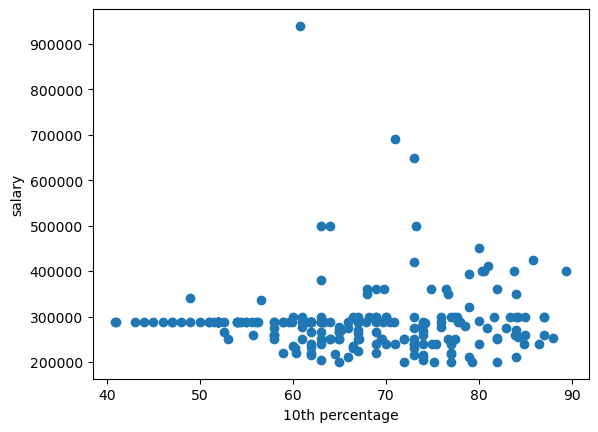

In [26]:
plt.xlabel("10th percentage")
plt.ylabel("salary")

plt.scatter(x='ssc_p',y='salary',data=df)

In [27]:
# As from above we can conclude that the 10th percentage is not play vital role for getting the better salary

In [36]:
df.groupby(['ssc_b'],as_index=False)['status'].value_counts(normalize=True).sort_values(by='proportion',ascending=False)

,ssc_b,status,proportion
2,Others,Placed,0.707071
0,Central,Placed,0.672414
1,Central,Not Placed,0.327586
3,Others,Not Placed,0.292929


In [37]:
# other ssc board having the littel high proparation getting the placement than central board

In [44]:
hsc_status=df.groupby(['hsc_s'],as_index=False)['status'].value_counts(normalize=True).sort_values(by='proportion',ascending=False)
hsc_status

,hsc_s,status,proportion
2,Commerce,Placed,0.699115
4,Science,Placed,0.692308
0,Arts,Placed,0.545455
1,Arts,Not Placed,0.454545
5,Science,Not Placed,0.307692
3,Commerce,Not Placed,0.300885


<Axes: xlabel='hsc_s', ylabel='proportion'>

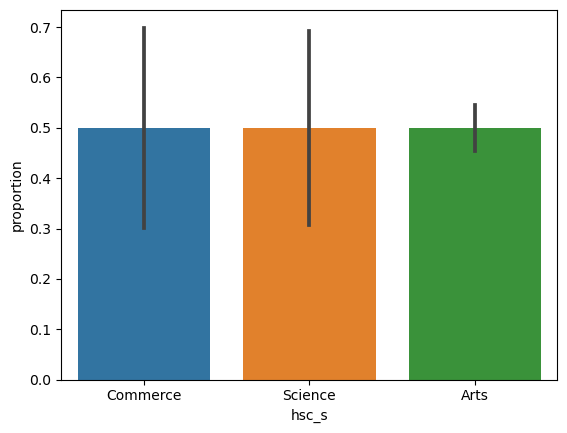

In [48]:
sns.barplot(x='hsc_s',y='proportion',data=hsc_status)


In [49]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


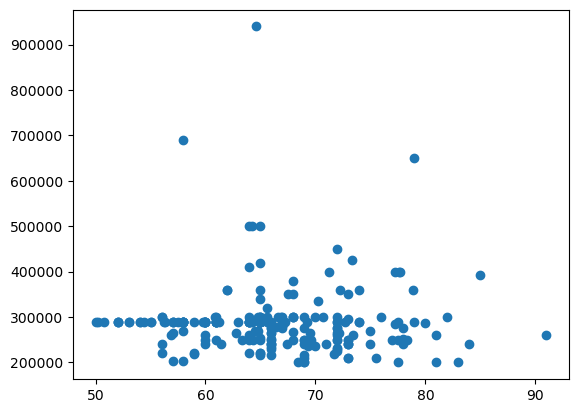

In [50]:
plt.scatter(x='degree_p',y='salary',data=df)

In [51]:
# degree percentage not affecting the salary too much

In [52]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [56]:
workex_proparation=df.groupby(['workex'],as_index=False)['status'].value_counts(normalize=True).sort_values(by='proportion',ascending=False)
workex_proparation

,workex,status,proportion
2,Yes,Placed,0.864865
0,No,Placed,0.595745
1,No,Not Placed,0.404255
3,Yes,Not Placed,0.135135


<Axes: xlabel='workex', ylabel='proportion'>

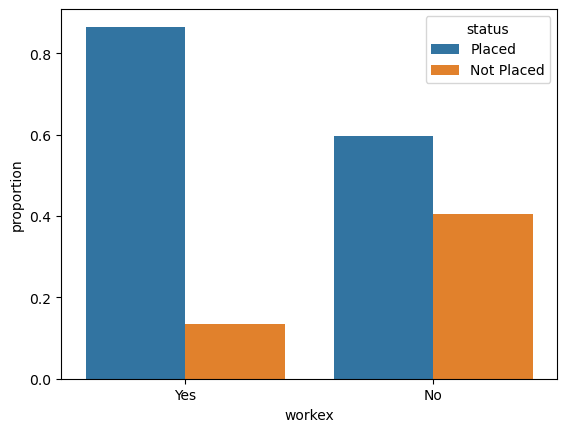

In [57]:
sns.barplot(x='workex',y='proportion',hue='status',data=workex_proparation)

In [58]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [59]:
specialisation_proparation=df.groupby(['specialisation'],as_index=False)['status'].value_counts(normalize=True).sort_values(by='proportion',ascending=False)
specialisation_proparation

,specialisation,status,proportion
0,Mkt&Fin,Placed,0.791667
2,Mkt&HR,Placed,0.557895
3,Mkt&HR,Not Placed,0.442105
1,Mkt&Fin,Not Placed,0.208333


<Axes: xlabel='specialisation', ylabel='proportion'>

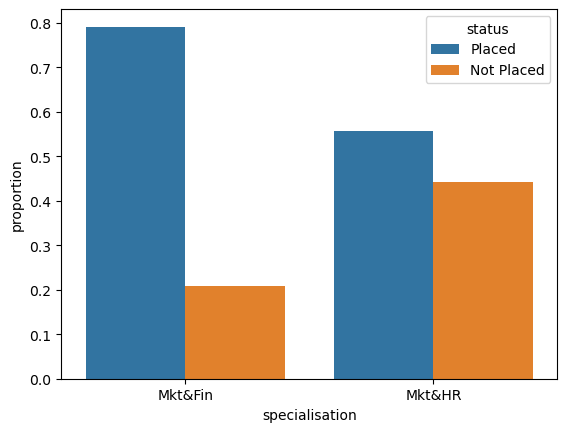

In [60]:
sns.barplot(x='specialisation',y='proportion',hue='status',data=specialisation_proparation)